In [1]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os
import eofs.standard as Eof_st
from eofs.multivariate.standard import MultivariateEof

from scipy.signal import butter, lfilter
from scipy.signal import convolve

import utilities

import importlib
def reimport_module(module_name):
    """
    Reimports the specified Python module.
    
    Args:
    module_name (module): The module to be reimported, typically passed as a variable.
    
    Returns:
    module: The reloaded module.
    """
    try:
        # Reload the already imported module
        reloaded_module = importlib.reload(module_name)
        print(f"Module {module_name.__name__} reloaded successfully.")
        return reloaded_module
    except Exception as e:
        print(f"Failed to reload module: {e}")

reimport_module(utilities)

Module utilities reloaded successfully.


<module 'utilities' from '/glade/work/wchapman/CMJO_Diagnostics_Tool/utilities.py'>

In [22]:
###########################################################################
######################### Templates #######################################
###########################################################################
dir_in = '/glade/derecho/scratch/wchapman/ADF/ERA5_data/ts'

filolr =  'ERA5.h1.FLUT.anomalies.1979010100000-1993123100000.nc'
var_name_olr = 'FLUT'
filu850 = 'ERA5.h1.U850.anomalies.1979010100000-1993123100000.nc'
var_name_u850 = 'U850'
filv850 = 'ERA5.h1.V850.anomalies.1979010100000-1993123100000.nc'
var_name_v850 = 'V850'
filu200 = 'ERA5.h1.U200.anomalies.1979010100000-1993123100000.nc' 
var_name_u200 = 'U200'
filz500 = 'ERA5..h1.Z500.anomalies.1979010100000-1993123100000.nc'
var_name_z500 = 'Z500'
z500_factor=1

###########################################################################
######################### Templates #######################################
###########################################################################

# dir_in_m = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_MEANmjo/ts/'
# filolr_m =  'f.e.FTORCHmjo_MEANmjo.cam.h1.FLUT.anomalies.1979010100000-1993122700000.nc'
# var_name_olr_m = 'FLUT'
# filu850_m = 'f.e.FTORCHmjo_MEANmjo.cam.h1.U850.anomalies.1979010100000-1993122700000.nc'
# var_name_u850_m = 'U850'
# filu200_m = 'f.e.FTORCHmjo_MEANmjo.cam.h1.U200.anomalies.1979010100000-1993122700000.nc' 
# var_name_u200_m = 'U200'
# filv850_m = 'f.e.FTORCHmjo_MEANmjo.cam.h1.V850.anomalies.1979010100000-1993122700000.nc'
# var_name_v850_m = 'V850'
# filz500_m = 'f.e.FTORCHmjo_MEANmjo.cam.h1.Z500.anomalies.1979010100000-1993122700000.nc'
# var_name_z500_m = 'Z500'
# z500_factor_m=9.81

###########################################################################
######################### Templates #######################################
###########################################################################

dir_in_m = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo/ts/'
filolr_m =  'f.e.FTORCHmjo_CNNmjo.cam.h1.FLUT.anomalies.1979010100000-1993122700000.nc'
var_name_olr_m = 'FLUT'
filu850_m = 'f.e.FTORCHmjo_CNNmjo.cam.h1.U850.anomalies.1979010100000-1993122700000.nc'
var_name_u850_m = 'U850'
filu200_m = 'f.e.FTORCHmjo_CNNmjo.cam.h1.U200.anomalies.1979010100000-1993122700000.nc' 
var_name_u200_m = 'U200'
filv850_m = 'f.e.FTORCHmjo_CNNmjo.cam.h1.V850.anomalies.1979010100000-1993122700000.nc'
var_name_v850_m = 'V850'
filz500_m = 'f.e.FTORCHmjo_CNNmjo.cam.h1.Z500.anomalies.1979010100000-1993122700000.nc'
var_name_z500_m = 'Z500'
z500_factor_m=9.81

##########################################################################
######################## Templates #######################################
##########################################################################

# dir_in_m = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo/ts/'
# filolr_m =  'f.e.FTORCHmjo_CNTRLmjo.cam.h1.FLUT.anomalies.1979010100000-1993122700000.nc'
# var_name_olr_m = 'FLUT'
# filu850_m = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.U850.anomalies.1979010100000-1993122700000.nc'
# var_name_u850_m = 'U850'
# filu200_m = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.U200.anomalies.1979010100000-1993122700000.nc' 
# var_name_u200_m = 'U200'
# filv850_m = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.V850.anomalies.1979010100000-1993122700000.nc'
# var_name_v850_m = 'V850'
# filz500_m = 'f.e.FTORCHmjo_CNTRLmjo.cam.h1.Z500.anomalies.1979010100000-1993122700000.nc'
# var_name_z500_m = 'Z500'
# z500_factor_m = 9.81

save_Fig_out = f'{dir_in_m}/{filolr_m.split(var_name_olr_m)[0]}MJO_Projected_EOFS_{var_name_olr_m}_{var_name_u200_m}_{var_name_u850_m}.png'
print(f'saving figure to {save_Fig_out}')
save_nc_out = f'{dir_in_m}/{filolr_m.split(var_name_olr_m)[0]}MJO_Projected_EOFS_{var_name_olr_m}_{var_name_u200_m}_{var_name_u850_m}.nc'
print(f'saving netcdf to {save_nc_out}')

saving figure to /glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo/ts//f.e.FTORCHmjo_CNNmjo.cam.h1.MJO_Projected_EOFS_FLUT_U200_U850.png
saving netcdf to /glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo/ts//f.e.FTORCHmjo_CNNmjo.cam.h1.MJO_Projected_EOFS_FLUT_U200_U850.nc


## Function

In [23]:
def process_data_eof(dir_in, filolr, filu200, filu850, var_name_olr, var_name_u200, var_name_u850):
    latSN = slice(-15, 15)
    f_low = 100  # Corresponds to 100 days period
    f_high = 20  # Corresponds to 20 days period

    # Load datasets
    DS_olr = xr.open_dataset(os.path.join(dir_in, filolr))
    DS_u200 = xr.open_dataset(os.path.join(dir_in, filu200))
    DS_u850 = xr.open_dataset(os.path.join(dir_in, filu850))

    # Create cosine latitude weighting
    weights = np.cos(np.deg2rad(DS_u200.lat))

    # Latitude average
    DS_olr = DS_olr.sel(lat=latSN).mean('lat')
    DS_u850 = DS_u850.sel(lat=latSN).mean('lat')
    DS_u200 = DS_u200.sel(lat=latSN).mean('lat')

    # Apply bandpass filter
    olr_f = utilities.bandpass_filter_via_fft_2d(np.array(DS_olr[var_name_olr]), f_high, f_low, sampling_interval=1)
    u850_f = utilities.bandpass_filter_via_fft_2d(np.array(DS_u850[var_name_u850]), f_high, f_low, sampling_interval=1)
    u200_f = utilities.bandpass_filter_via_fft_2d(np.array(DS_u200[var_name_u200]), f_high, f_low, sampling_interval=1)

    DS_olr['OLR_f'] = (('time', 'lon'), olr_f)
    DS_u850['U850_f'] = (('time', 'lon'), u850_f)
    DS_u200['U200_f'] = (('time', 'lon'), u200_f)

    # Normalize data
    olr = DS_olr['OLR_f'] / np.sqrt(DS_olr['OLR_f'].var("time").mean("lon"))
    u850 = DS_u850['U850_f'] / np.sqrt(DS_u850['U850_f'].var("time").mean("lon"))
    u200 = DS_u200['U200_f'] / np.sqrt(DS_u200['U200_f'].var("time").mean("lon"))

    return olr, u200, u850

## Prep Data and Take EOF

In [24]:
olr_e5, u200_e5, u850_e5 = process_data_eof(dir_in, filolr, filu200, filu850, var_name_olr, var_name_u200, var_name_u850)

# Perform Empirical Orthogonal Function (EOF) analysis
print(' ----- Taking the EOF ----- ')
solver = MultivariateEof([np.array(olr_e5), np.array(u850_e5), np.array(u200_e5)])
varfrac = solver.varianceFraction()
print(' ----- Done ----- ')
# Extract EOFs and PCs
eof_list = solver.eofs()
pcs = solver.pcs(pcscaling=1)

 ----- Taking the EOF ----- 
 ----- Done ----- 


## Plotting

creating scaling factors
Current Scaling Factors are:  1, 0, -1, 1


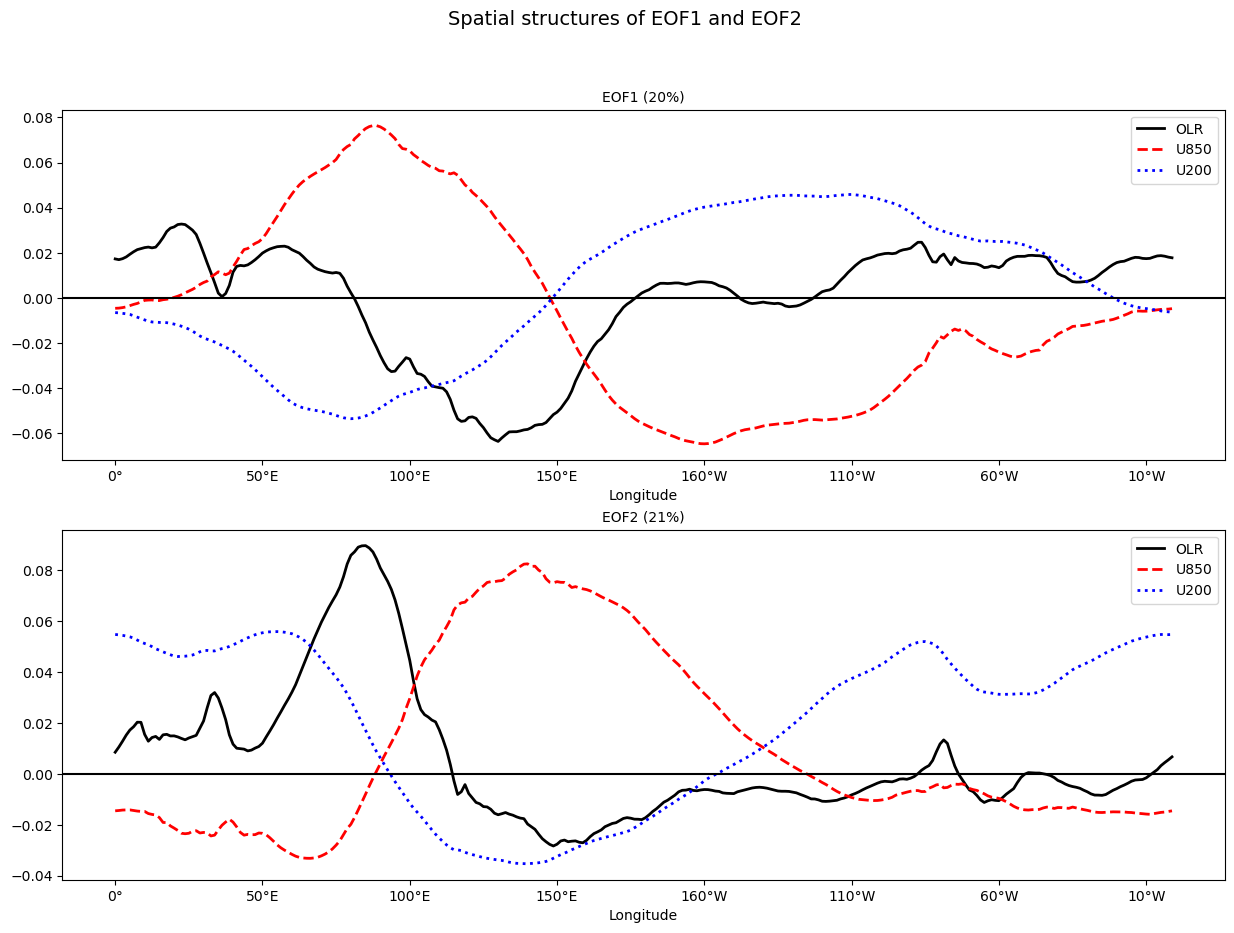

In [25]:
scaling_factors = None#[1, 0, -1, 1]
if scaling_factors is None:
    print('creating scaling factors')
    scaling_factors = utilities.check_MJO_orientation(eof_list, pcs,  olr_e5['lon'])
utilities.plot_obs_eof(eof_list, pcs, varfrac, olr_e5['lon'],save_Fig_out, scaling_factors)

## Print a Warning Statement

In [26]:
print(f'This may take some patience so be fucking kind for a second; model data doesnt always have the best field representation')
print(f'Therefore it is hard to write heuristics for orienting the EOFS')
print(f'Check that the orientation of the created figure is correct, if it is not, provide your own "scaling factors"')
print(f'check the figure against: https://www.ncl.ucar.edu/Applications/Images/mjoclivar_14_1_lg.png')
print(f'to do so include the flag --scaling_factors [0 , 1, -1, 1], where positions 1 and 2 select for eof number and 3 and 4 are multipliers')
print(f'--scaling_factors options: [[0,1] , [1,0], [-1,1], [-1,1]], where positions 1 and 2 select for eof number and 3 and 4 are multipliers')

This may take some patience so be fucking kind for a second; model data doesnt always have the best field representation
Therefore it is hard to write heuristics for orienting the EOFS
Check that the orientation of the created figure is correct, if it is not, provide your own "scaling factors"
check the figure against: https://www.ncl.ucar.edu/Applications/Images/mjoclivar_14_1_lg.png
to do so include the flag --scaling_factors [0 , 1, -1, 1], where positions 1 and 2 select for eof number and 3 and 4 are multipliers
--scaling_factors options: [[0,1] , [1,0], [-1,1], [-1,1]], where positions 1 and 2 select for eof number and 3 and 4 are multipliers


## Project onto the Model Runs

In [27]:
olr_m, u200_m, u850_m = process_data_eof(dir_in_m, filolr_m, filu200_m, filu850_m, var_name_olr_m, var_name_u200_m, var_name_u850_m)
pseudo_pcs = solver.projectField([np.array(olr_m), np.array(u850_m), np.array(u200_m)],eofscaling=1)
dicty = utilities.get_phase_and_eofs(eof_list, pseudo_pcs, olr_m['lon'], scaling_factors)
MJO_fobs = utilities.save_out_obs(dicty, u200_m, u850_m, olr_m, save_nc_out)
MJO_fobs

...saved out ...


<xarray.Dataset>
Dimensions:       (time: 5476, lon: 288)
Coordinates:
  * time          (time) object 1979-01-01 00:00:00 ... 1994-01-01 00:00:00
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables: (12/13)
    RMM1_obs      (time) float64 -0.03446 0.02882 0.1041 ... -0.1239 -0.08524
    RMM2_obs      (time) float64 -0.3988 -0.5288 -0.6539 ... -0.1597 -0.273
    RMMind_obs    (time) float64 0.4002 0.5296 0.6622 ... 0.1653 0.2022 0.286
    RMMphase_obs  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    olr_norm      (time, lon) float64 -0.8808 -0.9498 -1.109 ... -0.8307 -0.7689
    eof1_olr      (lon) float32 0.01727 0.01694 0.01737 ... 0.01807 0.01778
    ...            ...
    eof1_u850     (lon) float32 -0.004628 -0.004548 ... -0.004981 -0.004779
    eof2_u850     (lon) float32 -0.01453 -0.01441 -0.01423 ... -0.01478 -0.01454
    eof1_u200     (lon) float32 -0.006535 -0.006647 ... -0.00618 -0.006375
    eof2_u200     (lon) float32 0.05471 0.05456 0.05435 ... 0.05465 0.05469
    u200_norm     (time, lon) float64 -0.1754 -0.216 -0.2463 ... 0.05747 0.08962
    u850_norm     (time, lon) float64 -0.3515 -0.4731 ... -0.2846 -0.3815
Attributes:
    title:        MJO RMM Forecast eof(u850,u200,olr)
    description:  MJO obs in the dataset calculated as in Wheeler and Hendon ...
    author:       S2S_WH_MJO_Forecast_Research_Toolbox
    questions:    wchapman@ucar.edu